# Selección de características en modelos predictivos

Este proyecto es para IA de Moisés Calzado Cobo y Antonio Germán Márquez Trujillo

Estos archivos contienen los algoritmos implementados, pero no los importamos ya que en esta libreta los implementamos explicando su funcionamiento


In [1]:
## %run SFS.py
## %run SFFS.py

In [1]:
import pandas as pandas;
import time;
from sklearn.model_selection import cross_val_score;
from sklearn import tree;
from sklearn import preprocessing;
import numpy as np;
import matplotlib.pyplot as plt
pandas.set_option('max_colwidth', 800)

In [14]:
#datos = pandas.read_csv("datos/titanic.csv")
datos = pandas.read_csv("datos/BreastCancerDataset.csv")
#datos = pandas.read_csv("datos/diabetes.csv")
datos.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


El primer paso para proceder con la selección de características es el que consiste en definir una función que nos permita evaluar los resultados obtenidos a la hora de predecir una característica dado un número de variables. Por lo tanto, el método nos queda de la siguiente forma:

Tenemos una función que recibe las siguientes variables:
<ul>
    <li>Datos: El conjunto de datos a tratar</li>
    <li>Variables: Conjunto de columnas con las que entrenar nuestro modelo de predicción</li>
    <li>Objetivo: Columna a predecir</li>
    <li>N_exp: Número de experimentos a llevar a cabo</li>
    <li>Cv: COMPLETAR</li>
</ul>

Y nos devuelve la puntuación promedio obtenida a la hora de llevar a cabo los sucesivos experimentos sobre el conjunto de variables dado.

In [3]:
def evaluar_soluciones(datos, variables, objetivo, n_exp, cv):
    data_frame = pandas.DataFrame(data=datos)
    X = data_frame[variables]
    y = data_frame[objetivo]
    clf = tree.DecisionTreeClassifier()
    
    scores = cross_val_score(clf, X, y, cv=cv, scoring="balanced_accuracy")
    
    for i in range(n_exp-1):
        new_scores = cross_val_score(clf, X, y, cv=cv, scoring="balanced_accuracy") 
        scores = scores + new_scores
    
    scores = scores/n_exp
    return np.mean(scores)

Con la función mostrar_datos(variables) que implementamos a continuación, lo que queremos hacer es mostrar para cada conjunto de variables evaluado sus correspondientes resultados. De esta forma, lo que recibe es un array que contiene un array de variables en cada posición y el objetivo que no es mas que la variable que queremos priorizar:

In [4]:
def mostrar_datos(datos):
    datos_tabla = [['Mejor Solución', 'Tamaño', 'Rendimiento']]
    claves = datos.keys()
    
    for clave in claves:
        length = len(clave.split(", "))
        datos_tabla = datos_tabla +[[clave, length, datos[clave]]]

    return pandas.DataFrame(datos_tabla)

Definimos también una función que nos muestre los resultados obtenidos en una tabla

In [5]:
def pintar_resultados(resultados): 
    plt.rcdefaults()
    fig, ax = plt.subplots()

    # Example data
    people = resultados.keys()
    y_pos = np.arange(len(people))
    performance = resultado_SFFS.values()

    ax.barh(y_pos, performance, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(people)
    ax.invert_yaxis()
    ax.set_xlabel('Rendimiento')
    ax.set_title('Selección de características')
    plt.show()

Implementamos la función SFS

In [15]:
def SFS(datos, respuesta, d = 0):
    start = time.time()
    
    diccionario_resultado = {}
    soluciones_actual = []
    columnas = list(datos.columns)
    
    #Compruebo que la variable a predecir no esté en mi conjunto de variables a evaluar
    if respuesta in columnas:
        columnas.remove(respuesta)
        
    k = 0
    d = d if d else len(columnas)

    while(k<d):
        resultado = []
        score_resultado = 0

        for i in range(len(columnas)):
            
            #Compruebo que la nueva variable a evaluar no haya sido ya evaluada
            if columnas[i] not in soluciones_actual:
                solucionTemporal = list(soluciones_actual)
                solucionTemporal.append(columnas[i])
                new_resultado = evaluar_soluciones(datos, solucionTemporal, respuesta, 15, 10)
                
                #Si el resultado es favorable, actualizo el resultado final
                if new_resultado > score_resultado:
                    resultado = solucionTemporal
                    score_resultado = new_resultado
        
        soluciones_actual.append(resultado[len(resultado)-1])
        clave = ', '.join(soluciones_actual)
        diccionario_resultado[clave] = score_resultado
        k = k+1
        
    done = time.time()
    elapsed = done - start
    print(elapsed)
        
    return diccionario_resultado

Probamos el algoritmo SFS implementado:

In [16]:
resultado_SFS = SFS(datos, "Survived", 3)

11.909844398498535


Ahora que tenemos los resultados del algoritmo, los mostramos por pantalla:

In [17]:
mostrar_datos(resultado_SFS)

,0,1,2
0,Mejor Solución,Tamaño,Rendimiento
1,Initial,1,0.783354
2,"Initial, SibSp",2,0.805218
3,"Initial, SibSp, Deck",3,0.80772


Implementamos la funcion SFFS

In [22]:
def SFFS(datos, respuesta):
    start = time.time()
    diccionario_resultado = {}
    soluciones_actual = []
    añadidos = []
    eliminados = []
    columnas = list(datos.columns)
    k = 0
    
    #Compruebo que la variable a predecir no esté en mi conjunto de variables a evaluar
    if respuesta in columnas:
        columnas.remove(respuesta)
    
    while(k<10):
        resultado = []
        score_resultado = 0
        score_resultado_eliminado = 0
        resultado_eliminado = []
        eliminado = ''

        for i in range(len(columnas)):
            
            #Compruebo que la nueva variable a evaluar no haya sido ya evaluada o este en añadidos
            if columnas[i] not in soluciones_actual and columnas[i] not in añadidos:
                solucionTemporal = list(soluciones_actual)
                solucionTemporal.append(columnas[i])
                new_resultado = evaluar_soluciones(datos, solucionTemporal, respuesta, 15, 10)
                print(new_resultado)
                #Si el resultado es favorable, actualizo el resultado final
                if new_resultado > score_resultado:
                    resultado = solucionTemporal
                    score_resultado = new_resultado
        print("Fin")
        print()
        if len(resultado)>0:
            soluciones_actual.append(resultado[len(resultado)-1])
            añadidos.append(resultado[len(resultado)-1])
                
        score_resultado_eliminado = score_resultado
                
        if len(soluciones_actual)>1:
            for i in range(len(soluciones_actual)):

                #Compruebo que la variable a evaluar no este en eliminados
                if soluciones_actual[i] not in eliminados:
                    solucionTemporal = list(soluciones_actual)
                    solucionTemporal.remove(soluciones_actual[i])
                    new_resultado = evaluar_soluciones(datos, solucionTemporal, respuesta, 15, 10)

                    #Si el resultado es favorable, actualizo el resultado para eliminar la variable actual que
                    #ha sido quitada de la solución actual
                    if new_resultado > score_resultado_eliminado:
                        resultado_eliminado = solucionTemporal
                        score_resultado_eliminado = new_resultado
                        eliminado = soluciones_actual[i]
            
            if score_resultado<score_resultado_eliminado:     
                soluciones_actual = resultado_eliminado
                eliminados.append(eliminado)
                k=0
                
        if len(columnas) == len(datos.columns)-1:
            k = k+1
        
        if len(añadidos)<len(columnas):
            clave = ', '.join(soluciones_actual)
            diccionario_resultado[clave] = score_resultado_eliminado

    done = time.time()
    elapsed = done - start
    print("Tiempo empleado: ", elapsed)
    return diccionario_resultado

Probamos el algoritmo SFFS implementado:

In [23]:
resultado_SFFS = SFFS(datos, "diagnosis")

0.7916919191919192
0.590306637806638
0.8210497835497836
0.8054004329004328
0.5851262626262625
0.7144372294372294
0.80507215007215
0.8330050505050505
0.5623340548340549
0.5305916305916307
0.7487987012987014
0.5415728715728716
0.716381673881674
0.770450937950938
0.5071536796536796
0.549498556998557
0.6115007215007215
0.6164574314574314
0.4890909090909091
0.49429653679653673
0.8448484848484847
0.6060497835497837
0.8719444444444445
0.8702886002886003
0.5871212121212122
0.692994227994228
0.7960425685425686
0.8797691197691198
0.5687049062049062
0.6377813852813853
Fin

0.8900728715728718
0.8887065897065897
0.8907275132275132
0.8943578643578644
0.8747556517556518
0.8621438191438191
0.8694817219817221
0.8646702741702741
0.8525954785954786
0.8891839826839828
0.8754350649350648
0.8607893217893217
0.8640548340548341
0.9029324194324193
0.8568316498316498
0.8683186628186629
0.8625555555555555
0.8868083213083213
0.8656430976430975
0.8793023088023089
0.9155942760942761
0.8895069745069746
0.90930615680

0.9538576238576237
0.9499367484367482
0.9460817700817697
0.9383927368927368
0.9504345839345838
0.949196729196729
0.9434918229918228
0.9352077922077922
Fin

0.9473888888888888
0.9462106782106782
0.9373953823953824
0.9480824915824915
0.9498920153920155
0.9447828282828283
0.93365873015873
Fin

0.9443828763828763
0.9475947570947569
0.9468532948532948
0.9506777296777296
0.9434309764309765
0.9267532467532467
Fin

0.9461212121212121
0.9488181818181817
0.9465185185185184
0.9430382395382393
0.9255365560365559
Fin

0.9469822029822028
0.9463544973544972
0.9444523809523808
0.9282722462722461
Fin

0.9460375180375179
0.9440531505531504
0.9253169793169793
Fin

0.9442385762385763
0.9276774891774892
Fin

0.9250274170274169
Fin

Fin

Fin

Fin

Fin

Fin

Fin

Fin

Fin

Fin

Fin

Fin

Fin

Fin

Fin

Fin

Fin

Fin

Fin

Fin

Fin

Tiempo empleado:  386.7250905036926


Ahora que tenemos los resultados del algoritmo, los mostramos por pantalla:

In [16]:
mostrar_datos(resultado_SFFS)

,0,1,2
0,Mejor Solución,Tamaño,Rendimiento
1,worst concave points,1,0.879769
2,"worst concave points, worst radius",2,0.916123
3,"worst concave points, worst radius, mean texture",3,0.938956
4,"worst concave points, worst radius, mean texture, worst smoothness",4,0.9458
5,"worst concave points, worst radius, mean texture, worst smoothness, concavity error",5,0.948366
6,"worst radius, mean texture, worst smoothness, concavity error, worst concavity",5,0.953453
7,"worst radius, mean texture, worst smoothness, concavity error, worst concavity, mean perimeter",6,0.954228
8,"worst radius, mean texture, worst smoothness, concavity error, worst concavity, mean perimeter, area error",7,0.955826
9,"worst radius, mean texture, worst smoothness, concavity error, worst concavity, mean perimeter, area error, smoothness error",8,0.956334


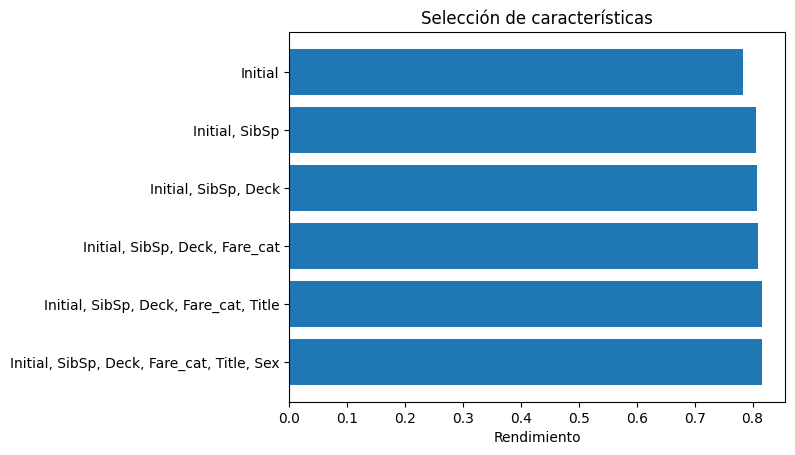

In [13]:
pintar_resultados(resultado_SFFS)